<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [27]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() #input 데이터 셋 생성 후 넘파이로 변환
fish_target = fish['Species'].to_numpy() #타겟 데이터 셋 생성 후 넘파이로 변환

In [28]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler #정규화
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [30]:
from sklearn.linear_model import SGDClassifier #stochastic gradient descent classifier

In [31]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42) #loss로 손실 함수 지정. loss= 'log' => 로지스틱 손실 함수 지정
#max_iter 는 수행 할 에포크 횟수 지정 여기선 10 에포크로 지정
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
#ConvergenceWarning: 모델이 충분히 수렴하지 않았다는(손실 함수의 산을 다 내려오지 못했다는) 소리이다. 이럴땐 에포크 값을 늘려주도록하자!

0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [32]:
sc.partial_fit(train_scaled, train_target) #partial_fit()으로 1 에포크씩 이어서 훈련
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


**에포크와 과대/과소 적합**

- 에포크가 너무 적으면 과소 적합일 확률 높음
- 에포크가 너무 크면 과대 적합일 확률 높음
- 그래서 모델이 과대 적합되기 시작하는 지점(테스트 세트의 점수가 감소하기 시작하는 지점)전에 멈추는 "조기종료"(early stopping)이 있음

In [34]:
#이 예제에서는 partial_fit()만 사용
#partial_fit()만 사용하기 위해서는 훈련 세트에 있는 전체 클래스의 label을 partial_fit() 메서드에 전달해 주어야함
import numpy as np
sc = SGDClassifier(loss = 'log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) #7개의 생선 목록 리스트 만듦

In [35]:
for _ in range(0, 300): # _ 는 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

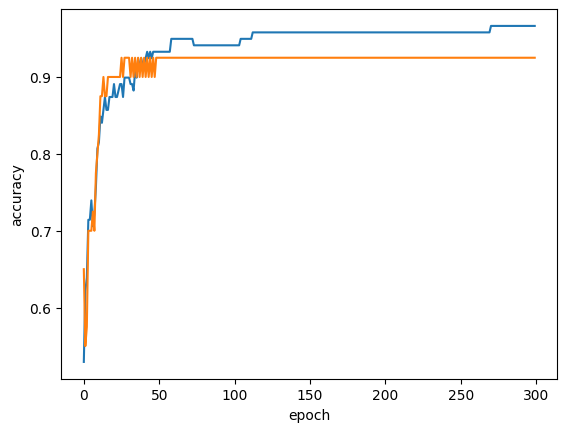

In [36]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show() #100 epoch 부터 훈련 세트 점수와 테스트 세트 점수가 멀어지기 시작함 => 100 epoch가 적절

In [38]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 100, tol = None, random_state = 42) #SGDClassifier는 일정 epoch 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다.
# tol 매개변수는 향상될 최솟값을 지정한다.
#tol을 None으로 지정하면, max_iter 만큼 무조건 반복한다.
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [39]:
#loss_log 대신 hinge 손실 함수를 이용해서 같은 epoch로 모델 훈련시켜보기
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None, random_state = 42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
